In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [2]:
def expand(a,b):
    d=(b-a)*0.05
    return a-d,b+d

In [3]:
data=np.loadtxt(r'F:\study\ml\DoctorZou\18EMII\18.HeightWeight.csv',
               dtype=np.float,delimiter=',',skiprows=1)
data.shape

(114, 3)

In [4]:
y,x=np.split(data,[1,],axis=1)
x,x_test,y,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

In [5]:
gmm=GaussianMixture(n_components=2,covariance_type='full',random_state=0)
x_min=np.min(x,axis=0)
x_max=np.max(x,axis=0)
gmm.fit(x)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
print('mean : ',gmm.means_)
print('covariance : ',gmm.covariances_)

mean :  [[ 160.13983374   55.93370575]
 [ 173.50243688   65.03359308]]
covariance :  [[[  18.82128194   12.30370549]
  [  12.30370549   31.23596113]]

 [[  23.22794989   28.48688647]
  [  28.48688647  105.81824734]]]


In [7]:
y_hat=gmm.predict(x)
y_test_hat=gmm.predict(x_test)
change=(gmm.means_[0][0]>gmm.means_[1][0])

In [8]:
if change:
    z=y_hat==0
    y_hat[z]=1
    y_hat[~z]=0
    z=y_test_hat==0
    y_test_hat[z]=1
    y_test_hat[~z]=0
acc=np.mean(y_hat.ravel()==y.ravel())
acc_test=np.mean(y_test_hat.ravel()==y_test.ravel())
acc_str='train set accurancy: %.2f%%' % (acc*100)
acc_test_str='train set accurancy: %.2f%%' % (acc_test*100)
print(acc_str)
print(acc_test_str)

train set accurancy: 77.94%
train set accurancy: 82.61%


In [9]:
cm_light=mpl.colors.ListedColormap(['#FF8080','#77E0A0'])
cm_dark=mpl.colors.ListedColormap(['r','g'])
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
x1_min,x1_max=expand(x1_min,x1_max)
x2_min,x2_max=expand(x2_min,x2_max)
x1,x2=np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
grid_test=np.stack((x1.flat,x2.flat),axis=1)
grid_hat=gmm.predict(grid_test)
grid_hat=grid_hat.reshape(x1.shape)

In [10]:
if change:
    z=grid_hat==0
    grid_hat[z]=1
    grid_hat[~z]=0

In [11]:
x_test.shape

(46, 2)

In [12]:
y_test[:,0]

array([ 0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  1.])

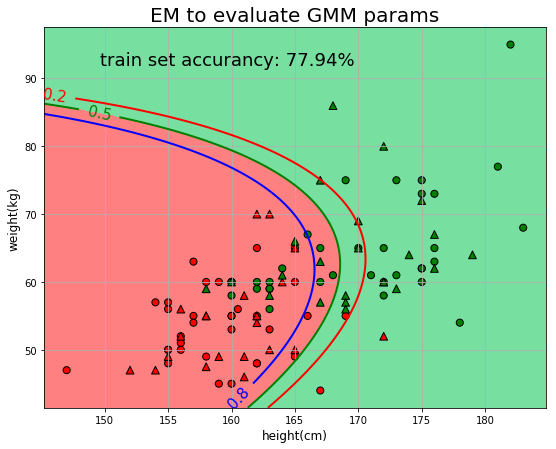

In [13]:
plt.figure(figsize=(9, 7), facecolor='w')
plt.pcolormesh(x1,x2,grid_hat,cmap=cm_light)
plt.scatter(x[:,0],x[:,1],s=50,c=y[:,0],marker='o',cmap=cm_dark,edgecolors='k')
plt.scatter(x_test[:,0],x_test[:,1],s=60,c=y_test[:,0],marker='^',
            cmap=cm_dark,edgecolors='k')
p=gmm.predict_proba(grid_test)
p=p[:,0].reshape(x1.shape)
CS=plt.contour(x1,x2,p,levels=(0.2,0.5,0.8),colors=list('rgb'),linewidths=2)
plt.clabel(CS,fontsize=15,fmt='%.1f',inline=True)
ax1_min,ax1_max,ax2_min,ax2_max=plt.axis()
xx=0.9*ax1_min+0.1*ax1_max
yy=0.1*ax2_min+0.9*ax2_max
plt.text(xx,yy,acc_str,fontsize=18)
yy=0.15*ax2_min+0.85*ax2_max
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.xlabel('height(cm)',fontsize='large')
plt.ylabel('weight(kg)',fontsize='large')
plt.title('EM to evaluate GMM params',fontsize=20)
plt.grid()
plt.show()